<a href="https://colab.research.google.com/github/Tdas-christ/Reinforcement_Learning/blob/main/2348569_RL_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the MDP
class MDP:
    def __init__(self, states, actions, transition_prob, rewards, gamma=0.9):
        self.states = states            # List of states
        self.actions = actions          # List of actions
        self.transition_prob = transition_prob  # Transition probabilities (S x A x S' matrix)
        self.rewards = rewards          # Rewards (S x A matrix)
        self.gamma = gamma              # Discount factor
        self.values = np.zeros(len(states))   # Initialize value function with zeros
        self.policy = np.zeros(len(states), dtype=int)  # Initialize policy (default action 0)

    # Perform the value iteration algorithm
    def value_iteration(self, theta=0.0001):
        delta = float('inf')  # Difference between old and new value estimates
        while delta > theta:
            delta = 0
            for state in range(len(self.states)):
                old_value = self.values[state]
                action_values = []

                # Calculate value of each action
                for action in range(len(self.actions)):
                    expected_value = 0
                    for next_state in range(len(self.states)):
                        prob = self.transition_prob[state][action][next_state]
                        expected_value += prob * (self.rewards[state][action] + self.gamma * self.values[next_state])
                    action_values.append(expected_value)

                # Choose the best action value
                best_value = max(action_values)
                self.values[state] = best_value
                delta = max(delta, abs(old_value - best_value))

        # Extract policy
        for state in range(len(self.states)):
            action_values = []
            for action in range(len(self.actions)):
                expected_value = 0
                for next_state in range(len(self.states)):
                    prob = self.transition_prob[state][action][next_state]
                    expected_value += prob * (self.rewards[state][action] + self.gamma * self.values[next_state])
                action_values.append(expected_value)
            best_action = np.argmax(action_values)
            self.policy[state] = best_action

    # Display the value function
    def display_value_function(self):
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(self.states)), self.values)
        plt.xlabel('States')
        plt.ylabel('Value')
        plt.title('Value Function')
        plt.show()

    # Display the policy
    def display_policy(self):
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(self.states)), self.policy)
        plt.xlabel('States')
        plt.ylabel('Best Action')
        plt.title('Optimal Policy')
        plt.show()

In [ ]:
# Example usage:

states = [0, 1, 2, 3]  # Define some states
actions = [0, 1]       # Define two actions: 0, 1 (e.g., left and right)

# Transition probabilities: [S x A x S'] matrix
transition_prob = np.array([
    [[0.7, 0.3, 0, 0],   [0.4, 0.6, 0, 0]],   # Probabilities from state 0
    [[0.1, 0.9, 0, 0],   [0, 0.5, 0.5, 0]],   # Probabilities from state 1
    [[0, 0, 0.8, 0.2],   [0, 0, 0.1, 0.9]],   # Probabilities from state 2
    [[0, 0, 0.5, 0.5],   [0, 0, 0.6, 0.4]]    # Probabilities from state 3
])

# Rewards: [S x A] matrix
rewards = np.array([
    [10, -1],    # Rewards for actions in state 0
    [-1, 5],     # Rewards for actions in state 1
    [2, 0],      # Rewards for actions in state 2
    [1, -2]      # Rewards for actions in state 3
])

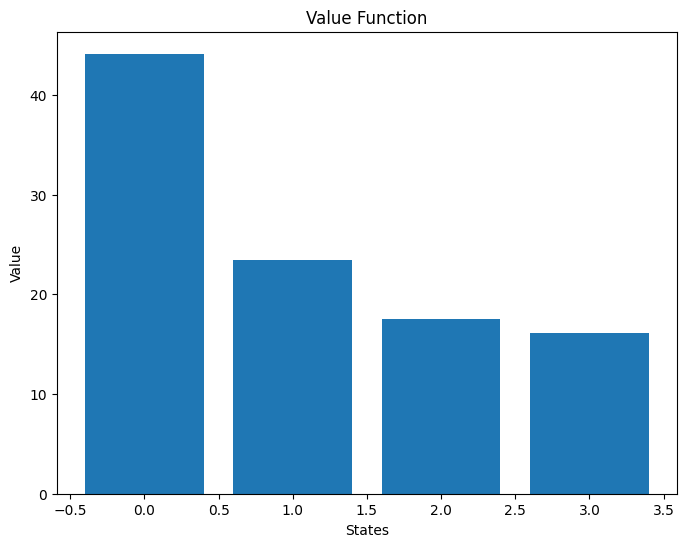

In [ ]:
# Initialize the MDP
mdp = MDP(states, actions, transition_prob, rewards, gamma=0.9)

# Perform value iteration
mdp.value_iteration()

# Visualize the value function
mdp.display_value_function()

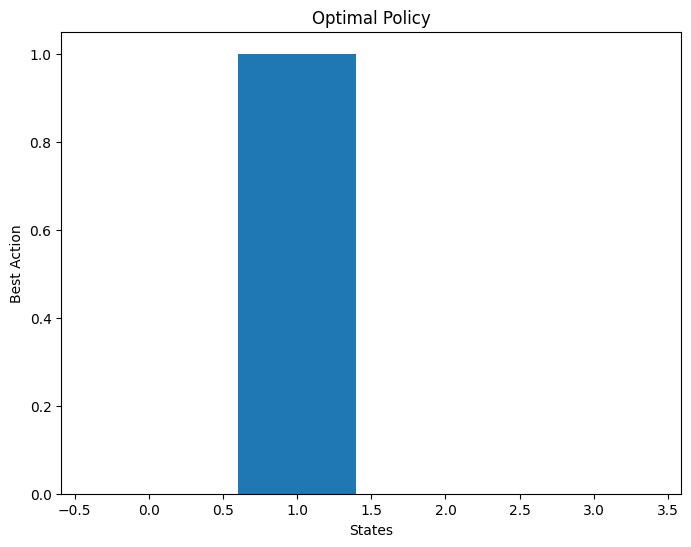

In [ ]:

# Visualize the optimal policy
mdp.display_policy()

- MDP Definition: The MDP has states, actions, transition probabilities, and rewards. The discount factor (gamma) determines how future rewards are valued.

- Value Iteration: The value_iteration method iteratively updates the value function for each state until convergence. The best policy is then extracted by choosing the action that maximizes the value in each state.

- Visualization: The display_value_function and display_policy methods create bar charts to show the value function and the optimal policy across states.